# IS4487 Week 10 - Assignment

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data
3. Fit a model
4. Test the accuracy of the model
6.  Use the model to predict on a new dataset (without the target)

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Case: AdviseInvest
You work on a small team of data analysts at AdviseInvest, a venture-backed startup. The Director of Sales at AdviseInvest has approached your team asking for help solving a staffing problem.

### The Company
The company's mission is to provide tools and support to help ordinary people gain control of their personal finances. The company leverages technology to provide affordable financial advice to a national client base.

Customers who reach AdviseInvest's website go through five steps:

- Open an account.
- Complete a customer profile form with basic information about their background and finances.
- Schedule a free phone conversation with a sales representative during a 1-hour window of time.
- Attend the free phone conversation.
- Buy a financial plan.
- There are three types of financial plans: Beginner, Intermediate, and Advanced. Each is sold at a different price, and there are varying degrees of personalization. After a customer purchases a financial plan, the customer is assigned a financial planner who helps determine the customer's goals and advises the customer on spending decisions.

### The Problem
Some customers are lost at each stage of the process. Steps 3 and 4 are particularly challenging because approximately 50% of those who schedule a phone conversation fail to pick up the call. This leads to inefficiencies from a staffing perspective.

AdviseInvest has 4 sales reps on staff during each particular 1-hour window. Each of the 4 reps is assigned 2 prospective customers per hour, which means that the company schedules a total of 8 phone calls per hour. The calls are outgoing: sales reps call customers who scheduled a phone conversation during that hour window.

Unfortunately, as noted above, many of the customers who scheduled a call do not answer. As a consequence, sales reps are often left underutilized. Moreover, they are underutilized unevenly. For example, it is possible that one sales rep will not do any sales calls during that hour, whereas another will be busy the entire hour with two calls. Sales reps have nothing to do when customers do not answer the scheduled phone call.

### AdviseInvest Data Dictionary


| Variable | Description | Type | Code |
|:---|:---|:---|:---|
| Answered | Customer response | Binary | 0: customer did not answer scheduled call; 1: customer answered scheduled call |
| Income | Customer income in US dollars | Numeric | |
| Female | Customer gender | Binary | 0: female; 1: male |
| Age | Age in years | Numeric | |
| Job | Nature of job | Categorical | 0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer |
| Num_dependents | Number of people for whom the customer provides maintenance | Numeric | |
| Rent | Customer rents | Binary | 0: no; 1: yes |
| Own_res | Customer owns residence | Binary | 0: no; 1: yes |
| New_car | Recent new car purchase | Binary | New car purchase in the last 3 months: 0: no, 1: yes |
| Chk_acct | Checking account status | Categorical | 0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD |
| Sav_acct | Average balance in savings account | Categorical | 0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD |
| Num_accts | Number of accounts owned by customer | Numeric | |
| Mobile | Mobile phone | Binary | 0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call |
| Product | Type of product purchased after conversation with sales rep | Categorical | 0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan |

### Load Libraries

Import the libraries you will need, such as:
- Pandas
- Sklearn
- Matplotlib


In [50]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

## Step 1: Initial Data Understanding

### Do the following:
 - Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)
 - Describe or profile the dataframe
 - Look for any outliers, missing values, or duplicates

In [ ]:
#Import the data 🔧

In [23]:
df = pd.read_csv('/content/adviseinvest_historical_data (2).csv')

In [ ]:
#View the datatypes 🔧

In [24]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  object 
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 3.2+ MB


None

In [ ]:
#Describe the data 🔧

In [25]:
# Describe the data
display(df.describe())

# Check for missing values
display(df.isnull().sum())

# Check for duplicate rows
print("Number of duplicate rows:")
display(df.duplicated().sum())

,answered,income,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,34.773454,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458345,0.091106,1.535792
std,0.497829,29379.202710,11.369865,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497380,0.287765,1.625916
min,0.000000,-65600.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,132.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


,0
answered,0
income,0
female,0
age,0
job,0
num_dependents,0
rent,0
own_res,0
new_car,2
chk_acct,0


Number of duplicate rows:


np.int64(29035)

## Step 2: Data Preparation

### 2.1: Data Cleanup
- Remove any variables that are not relevant to our analysis (be sure not to delete too many variables, you may need them in the near future!)
- Clean up the data and put it in a new datafram named "df_clean"


In [ ]:
#delete outliers 🔧

In [26]:
# Remove outliers using IQR
df_clean = df.copy()

for col in ['age', 'income', 'num_accts']:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print("Shape of the DataFrame after outlier removal:")
display(df_clean.shape)

Shape of the DataFrame after outlier removal:


(24572, 14)

In [ ]:
#remove variables that are not helpful 🔧

In [27]:
# Remove irrelevant variables
df_clean = df_clean.drop('product', axis=1)

print("Columns remaining in the DataFrame:")
display(df_clean.columns)

Columns remaining in the DataFrame:


Index(['answered', 'income', 'female', 'age', 'job', 'num_dependents', 'rent',
       'own_res', 'new_car', 'chk_acct', 'sav_acct', 'num_accts', 'mobile'],
      dtype='object')

In [ ]:
#cleanup any missing or non-standardized data 🔧

In [28]:
# Impute missing values in 'new_car' with the mode
mode_new_car = df_clean['new_car'].mode()[0]
df_clean['new_car'].fillna(mode_new_car, inplace=True)

# Standardize 'female' column (assuming '0' is female and '1' is male based on data dictionary)
df_clean['female'] = df_clean['female'].apply(lambda x: 1 if x == '1' else 0)

print("Missing values after cleanup:")
display(df_clean.isnull().sum())

print("\nValue counts for 'female' after standardization:")
display(df_clean['female'].value_counts())

Missing values after cleanup:


/tmp/ipython-input-3549360564.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['new_car'].fillna(mode_new_car, inplace=True)


,0
answered,0
income,0
female,0
age,0
job,0
num_dependents,0
rent,0
own_res,0
new_car,0
chk_acct,0



Value counts for 'female' after standardization:


,count
female,
0,23165
1,1407


### 2.2: Standardize variables

 - Change "answered" to yes/no and make it categorical
 - Convert any variables that should be an integer into an integer

In [ ]:
# Convert answered to categorical 🔧


In [29]:
df_clean['answered'] = df_clean['answered'].map({0: 'no', 1: 'yes'})
df_clean['answered'] = df_clean['answered'].astype('category')

print("Value counts for 'answered' after conversion:")
display(df_clean['answered'].value_counts())

Value counts for 'answered' after conversion:


,count
answered,
yes,14334
no,10238


In [ ]:
# Convert variables to integer data type 🔧

In [30]:
# Convert 'new_car' to integer data type
df_clean['new_car'] = df_clean['new_car'].astype(int)

print("Data types after converting 'new_car' to integer:")
display(df_clean.info())

Data types after converting 'new_car' to integer:
<class 'pandas.core.frame.DataFrame'>
Index: 24572 entries, 1 to 29502
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   answered        24572 non-null  category
 1   income          24572 non-null  int64   
 2   female          24572 non-null  int64   
 3   age             24572 non-null  int64   
 4   job             24572 non-null  int64   
 5   num_dependents  24572 non-null  int64   
 6   rent            24572 non-null  int64   
 7   own_res         24572 non-null  int64   
 8   new_car         24572 non-null  int64   
 9   chk_acct        24572 non-null  int64   
 10  sav_acct        24572 non-null  int64   
 11  num_accts       24572 non-null  int64   
 12  mobile          24572 non-null  int64   
dtypes: category(1), int64(12)
memory usage: 2.5 MB


None

### 2.3 Convert variables to categorical

- Find at least 8 variables that would be appropriate to convert to categories

In [ ]:
#Convert categorical variables 🔧

In [31]:
# Convert appropriate variables to categorical data type
categorical_cols = ['job', 'female', 'rent', 'own_res', 'new_car', 'chk_acct', 'sav_acct', 'mobile']

for col in categorical_cols:
    df_clean[col] = df_clean[col].astype('category')

print("Data types after converting to categorical:")
display(df_clean.info())

Data types after converting to categorical:
<class 'pandas.core.frame.DataFrame'>
Index: 24572 entries, 1 to 29502
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   answered        24572 non-null  category
 1   income          24572 non-null  int64   
 2   female          24572 non-null  category
 3   age             24572 non-null  int64   
 4   job             24572 non-null  category
 5   num_dependents  24572 non-null  int64   
 6   rent            24572 non-null  category
 7   own_res         24572 non-null  category
 8   new_car         24572 non-null  category
 9   chk_acct        24572 non-null  category
 10  sav_acct        24572 non-null  category
 11  num_accts       24572 non-null  int64   
 12  mobile          24572 non-null  category
dtypes: category(9), int64(4)
memory usage: 1.1 MB


None

# Step 3: Exploratory Data Analysis (EDA)

### Do the following:
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted



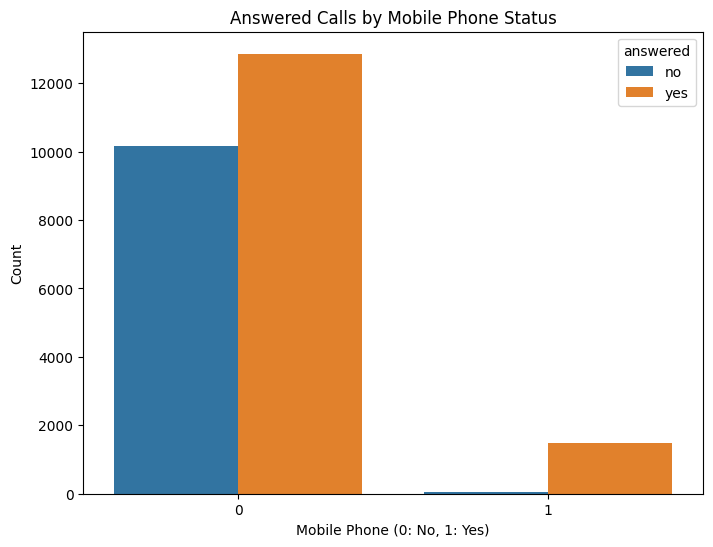

In [38]:
# Chart 1: Relationship between 'answered' and 'mobile'
plt.figure(figsize=(8, 6))
sns.countplot(x='mobile', hue='answered', data=df_clean)
plt.title('Answered Calls by Mobile Phone Status')
plt.xlabel('Mobile Phone (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

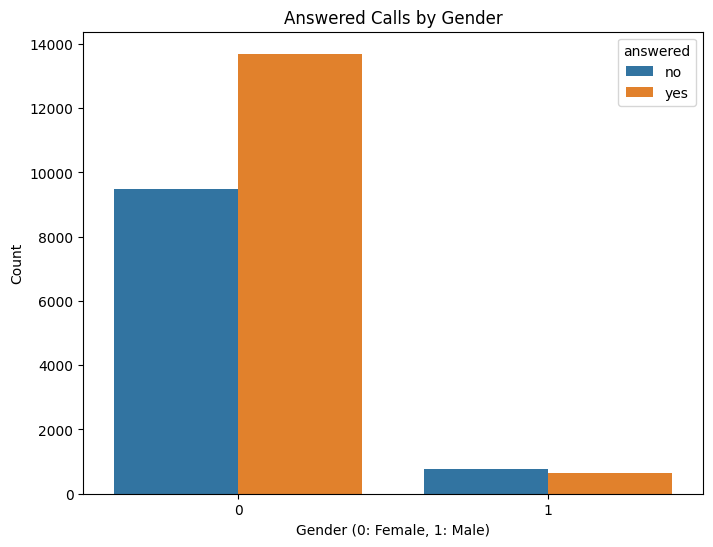

In [33]:
# Chart 2: Relationship between 'answered' and 'female'
plt.figure(figsize=(8, 6))
sns.countplot(x='female', hue='answered', data=df_clean)
plt.title('Answered Calls by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

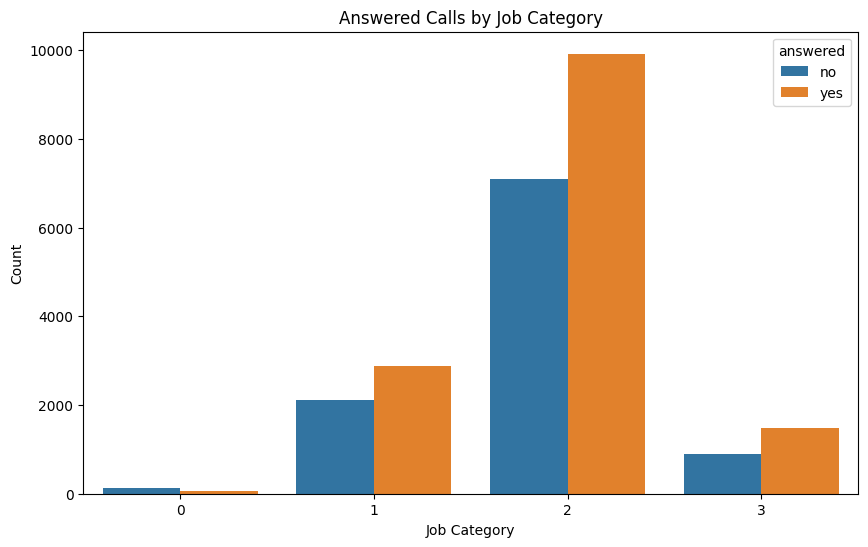

In [34]:
# Chart 3: Relationship between 'answered' and 'job'
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='answered', data=df_clean)
plt.title('Answered Calls by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.show()

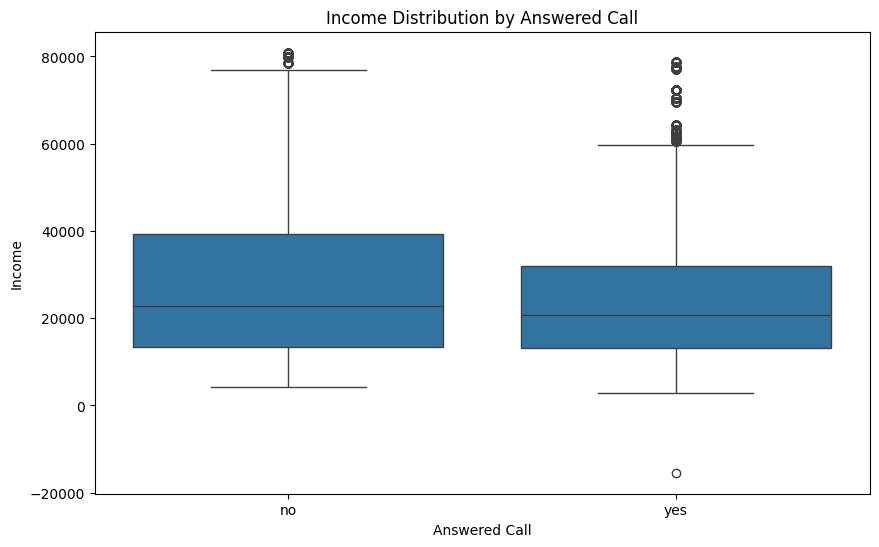

In [35]:
# Chart 4: Relationship between 'answered' and 'income'
plt.figure(figsize=(10, 6))
sns.boxplot(x='answered', y='income', data=df_clean)
plt.title('Income Distribution by Answered Call')
plt.xlabel('Answered Call')
plt.ylabel('Income')
plt.show()

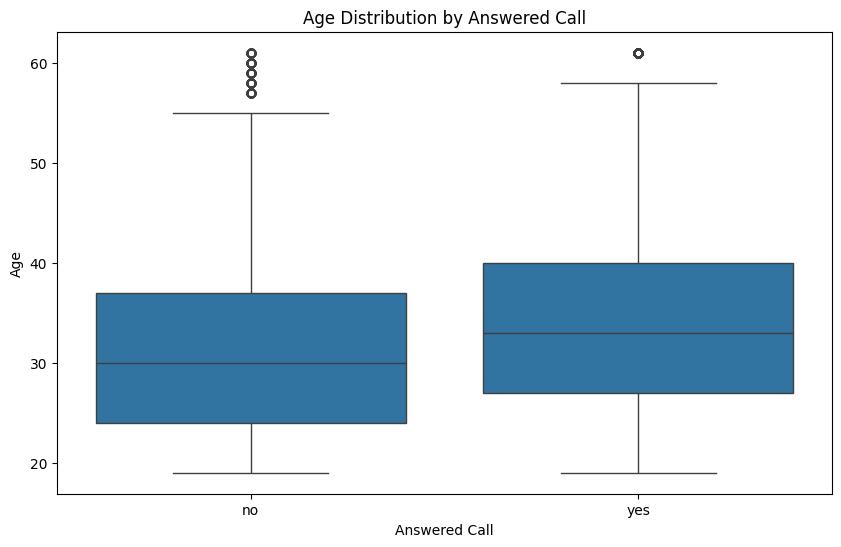

In [36]:
# Chart 5: Relationship between 'answered' and 'age'
plt.figure(figsize=(10, 6))
sns.boxplot(x='answered', y='age', data=df_clean)
plt.title('Age Distribution by Answered Call')
plt.xlabel('Answered Call')
plt.ylabel('Age')
plt.show()

## Step 4: Modeling

### 4.1: Calculate the base probability of answering

If we use no model at all, how good is our chance of predicting someone leaving?  Use a calculation to find the chances of someone leaving.

In [ ]:
#get the default probability 🔧

In [39]:
# Calculate the base probability of not answering
base_probability_leaving = (df_clean['answered'] == 'no').mean()

print(f"Base probability of a customer not answering the call: {base_probability_leaving:.4f}")

Base probability of a customer not answering the call: 0.4167


### 4.2: Split the training and testing datasets

- split df_clean using train_test_split function
- all variables except answered should be in the x variable
- answered is in the y variable


In [ ]:
# Split data into training and testing sets 🔧


In [43]:
# Split data into training and testing sets
x = df_clean.drop('answered', axis=1)
y = df_clean['answered']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (19657, 12)
Shape of x_test: (4915, 12)
Shape of y_train: (19657,)
Shape of y_test: (4915,)


### 4.3: Create a Decision Tree
- Use all available attributes (except those that were eliminated in step 3)
- It is recommended to use the type "entropy" and a max_depth of 4

In [ ]:
#create a tree  🔧

In [61]:
# Create a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

# Train the model
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [ ]:
#display (visualize) the tree 🔧

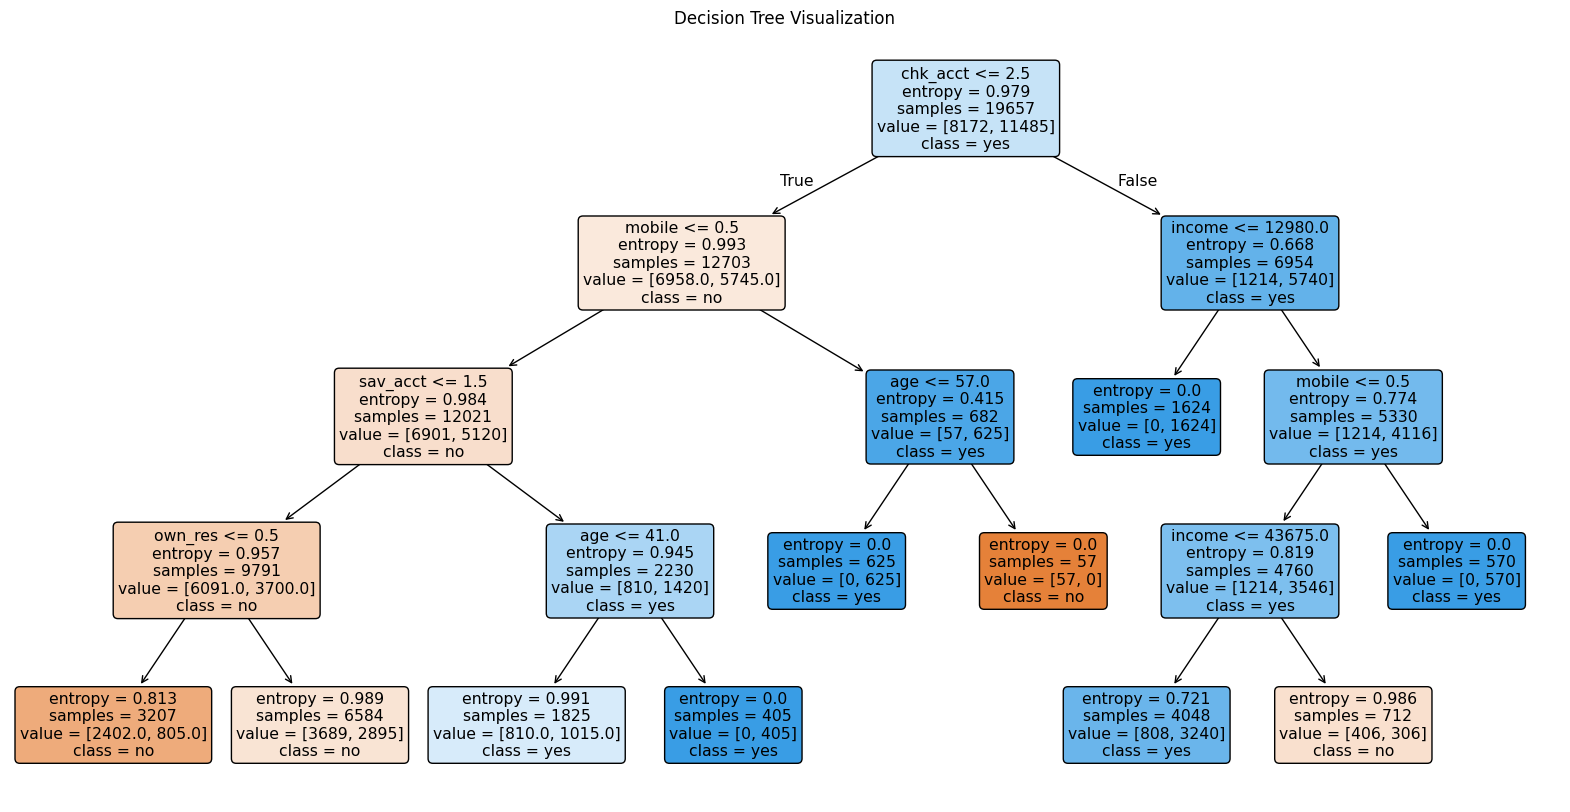

In [62]:
# Display (visualize) the tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=x.columns, class_names=['no', 'yes'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

### 4.4: What is the accuracy?

This should be better than the base probability, or you have failed in your objective

In [ ]:
#calculate the probability for your tree 🔧

In [63]:
# Predict on the test set
y_pred = dt_model.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the Decision Tree model: {accuracy:.4f}")

Accuracy of the Decision Tree model: 0.7119


### 4.5: Create a confusion matrix

This will show false positives, true positives, etc.

In [ ]:
#create a basic confusion matrix 🔧


In [64]:
# Create a basic confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
display(cm)

Confusion Matrix:


array([[1636,  430],
       [ 986, 1863]])

Create a more visual, interpretable version of the matrix

In [ ]:
#Create a beautiful matrix; hint - try using Seaborn Heatmap 🔧

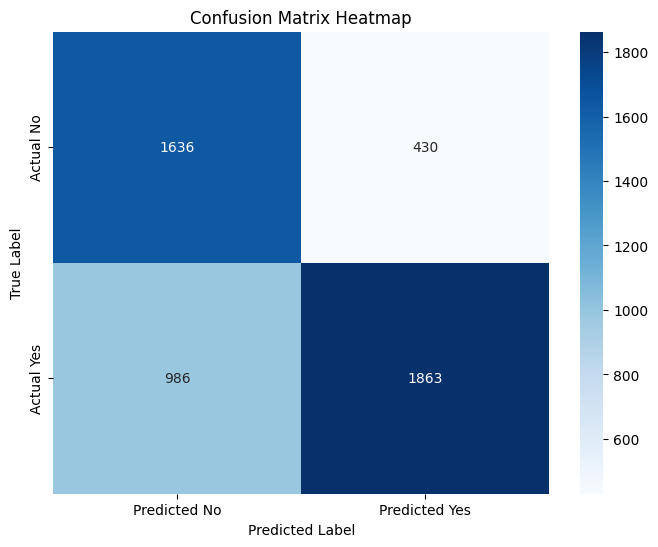

In [65]:
# Create a more visual confusion matrix using Seaborn Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Step 5: Evaluate the Model

**Assumptions**

One of the simplifying assumptions we will make in this project is that all the customers who answer the phone will purchase a product. (This assumption is actually verified by the data.) To model "answered" in this case is therefore equivalent to modeling "purchased."

There are costs and benefits in this case. We will assume that customers purchase a product for 100 dollars. This was the average cost of AdviseInvest products, according to the Director of Sales.  Also, as we learned in the interview, the agent time to make the sale is worth 25 dollars. Profit would therefore be \$75 dollars for an answered call and a purchase. In sum:

**Benefit**: True positive. The customer is predicted to answer, does answer, and purchases a product for 100 dollars for a profit of 100 - 25 = 75.

**Cost**: False positive. The customer is predicted to answer, but does not answer, so there is a loss of 25. (We assume the agent cannot schedule another call at the last minute, or spends the entire time slot trying to make the call.)

When you create a calculation you can use:
- True answered * 75 -> These people purchased
- False answered * 25 -> You can't schedule another call

For this exercise, we propose that customers who are not predicted to answer will not be called, so there would be no benefits and no costs for them.  

### 5.1 Calculate the Profit Using the Model

In [ ]:
# Write a calcuation for the profit from your model 🔧

In [81]:
# Extract counts from the confusion matrix of the initial model
# The confusion matrix is structured as:
# [[True Negative, False Positive],
#  [False Negative, True Positive]]
tn, fp, fn, tp = cm.ravel()

# Calculate revenue from true positives
revenue_tp = tp * 75

# Calculate costs from false positives
costs_fp = fp * 25

# Calculate profit
profit = revenue_tp - costs_fp

print(f"True Positives (Revenue) with Initial Model: ${revenue_tp}")
print(f"False Positives (Costs) with Initial Model: ${costs_fp}")
print(f"Calculated Profit using the Initial model: ${profit}")

True Positives (Revenue) with Initial Model: $139725
False Positives (Costs) with Initial Model: $10750
Calculated Profit using the Initial model: $128975


### 5.2 Compare to the Default Profit

How much profit (revenue - costs) could be expected if all customers are called? We can consider this a baseline case for profit since it does not require a model.

In other words, to calculate profit in this baseline scenario treat the customers who answer as true positives treat the customers who do not answer as false positives.

In [ ]:
#Write a calculation for the overall profit without using the model (default) 🔧

In [82]:
# Calculate the number of answered and not answered calls in the entire dataset
total_answered = (df_clean['answered'] == 'yes').sum()
total_not_answered = (df_clean['answered'] == 'no').sum()

# Calculate baseline profit (assuming all customers are called)
baseline_revenue_tp = total_answered * 75
baseline_costs_fp = total_not_answered * 25

baseline_profit = baseline_revenue_tp - baseline_costs_fp

print(f"Total Answered Calls: {total_answered}")
print(f"Total Not Answered Calls: {total_not_answered}")
print(f"Baseline True Positives (Revenue): ${baseline_revenue_tp}")
print(f"Baseline False Positives (Costs): ${baseline_costs_fp}")
print(f"Calculated Baseline Profit (without model): ${baseline_profit}")

Total Answered Calls: 14334
Total Not Answered Calls: 10238
Baseline True Positives (Revenue): $1075050
Baseline False Positives (Costs): $255950
Calculated Baseline Profit (without model): $819100


### 5.3 Tune the Model
- Adjust the size or shape of the tree, then test the accuracy
- Keep changing these parameters until you end up with a tree with accuracy that is better than the initial model

In [ ]:
# Create a new version of the tree with new parameters 🔧

In [73]:
# Create a new version of the Decision Tree Classifier with adjusted parameters
dt_model_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)

# Train the tuned model
dt_model_tuned.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)

In [ ]:
# Calculate a new probability 🔧

In [74]:
# Predict on the test set using the tuned model
y_pred_tuned = dt_model_tuned.predict(x_test)

# Calculate the accuracy of the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print(f"Accuracy of the Tuned Decision Tree model: {accuracy_tuned:.4f}")

Accuracy of the Tuned Decision Tree model: 0.8153


### 5.4 Apply the Model to New Customers
- Import the "adviseinvest_new_customer_data.csv" file
- Using the tree model, predict each customer for the target variable  by feeding the new customer data into the model

In [ ]:
#Import new customer data into a new data frame 🔧

In [76]:
#Import new customer data into a new data frame
new_customer_df = pd.read_csv('/content/adviseinvest_new_customer_data (1).csv')
display(new_customer_df.head())

,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,customer_id
0,30010,0,40,2,1,1,0,0,1,0,3,0,H1597
1,30510,0,54,2,1,0,1,0,0,0,2,0,P1446
2,12880,0,48,2,2,0,1,0,0,1,4,0,E1492
3,15530,0,44,2,1,0,1,0,0,0,2,0,W5143
4,46230,0,40,3,1,0,1,0,3,1,2,0,W4927


In [ ]:
#Predict the number of customers who will be yes/no for the target variable 🔧

In [77]:
# Prepare the new customer data for prediction
# Drop the 'customer_id' as it's not a feature for the model
new_customer_features = new_customer_df.drop('customer_id', axis=1)

# Ensure the new customer data has the same categorical columns and data types as the training data
# Convert appropriate variables to categorical data type
categorical_cols = ['job', 'female', 'rent', 'own_res', 'new_car', 'chk_acct', 'sav_acct', 'mobile']
for col in categorical_cols:
    new_customer_features[col] = new_customer_features[col].astype('category')

# Predict the 'answered' status for the new customers using the tuned model
new_customer_predictions = dt_model_tuned.predict(new_customer_features)

# Add the predictions to the new customer DataFrame
new_customer_df['predicted_answered'] = new_customer_predictions

print("Predictions for new customers:")
display(new_customer_df[['customer_id', 'predicted_answered']].head())

Predictions for new customers:


,customer_id,predicted_answered
0,H1597,no
1,P1446,yes
2,E1492,no
3,W5143,yes
4,W4927,no


# Step 6: Conclusion
### 6.1: Did we improve our profit using the model?  

Write your conclusion notes below:  🔧

In [78]:
print(f"Profit using the tuned model: ${profit}")
print(f"Baseline Profit (without model): ${baseline_profit}")

if profit > baseline_profit:
    print("\nYes, we improved our profit using the tuned model.")
elif profit < baseline_profit:
    print("\nNo, the profit decreased using the tuned model compared to the baseline.")
else:
    print("\nThe profit is the same using the tuned model and the baseline.")

Profit using the tuned model: $128975
Baseline Profit (without model): $819100

No, the profit decreased using the tuned model compared to the baseline.


The profit was not impoved using the model. This is probably because the model is being too conservative in identifying potential customers. From what I understand this could be because the threshold is too high, so we could lower that to try and make it more even.  

### 6.2: How could the model be utilized by the business?

Write your recommendations below:  🔧

Some recomendations could be to maximize the calling agents time by not even calling customers that fall into the 'will not answer' category, which will save the company $25 per person. Another thing the company could do is to create a targeted marketing plan to switch the false positive (called but not puchased) customers into the true positive category. Lastly, we can try to imporve our model to make the profit calutaions closer to the base case.

## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [ ]:
!jupyter nbconvert --to html "assignment_10_LastnameFirstname.ipynb"